# API Docs

<!-- **Development:** <br>
<https://api.radiomemory.com.br/ia-dev/api/v1/docs> <br>
<https://api.radiomemory.com.br/ia-dev/api/v1/redoc> -->

**Production:**: <br>
<https://kcmj21es3e.execute-api.us-east-1.amazonaws.com/prod/v1/docs> <br>
<https://kcmj21es3e.execute-api.us-east-1.amazonaws.com/prod/v1/redoc>

<!-- **This Page Direct Link:** <br>
<https://api.radiomemory.com.br/ia-dev/api/v1/examples/main> <br> -->

**This Page Source Code:** <br>
https://github.com/Radio-Memory/radiomemory-ai-api-demo

In [1]:
import config as cfg
import requests
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import pprint

import plotly.offline as offline
offline.init_notebook_mode(connected=True)

%matplotlib inline

pp = pprint.PrettyPrinter(indent=4)

BASE_URL = "https://kcmj21es3e.execute-api.us-east-1.amazonaws.com/prod/v1"

def encode_image(image):

    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    image64 = base64.b64encode(buffered.getvalue())
    return image64.decode()

# Authentication

In [2]:
response = requests.post(
        BASE_URL + "/auth/token",
        data={
            "username": cfg.USERNAME,
            "password": cfg.PASSWORD,
        },
    )
token = response.json()["access_token"]
headers = {"Authorization": "Bearer %s" % token}

# Panoramics

In [3]:
# The image is converted to grayscale in the backend, so you can convert it before sending in order to save bandwidth.
panoramic_image = Image.open("images/panoramic0.jpg").convert("L")

## Dentition Endpoint

Classify the panoramic radiography in either toothless, superior toothless, inferior toothless, mixed or "normal".

In [4]:
dentition_response = requests.post(
        BASE_URL + "/panoramics/dentition",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

In [5]:
pdata = dentition_response.json()
pdata["entities"] = pdata["entities"][:4]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'normal',
                        'contour': None,
                        'heatmap': None,
                        'line': None,
                        'model_name': 'dentition',
                        'point': None,
                        'score': 1.0,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'superior_toothless',
                        'contour': None,
                        'heatmap': None,
                        'line': None,
                        'model_name': 'dentition',
                        'point': None,
                        'score': 1.1038895353365774e-09,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'mixed',
                        'contour': None,
                        'heatmap': None,
                        'line': None,
                

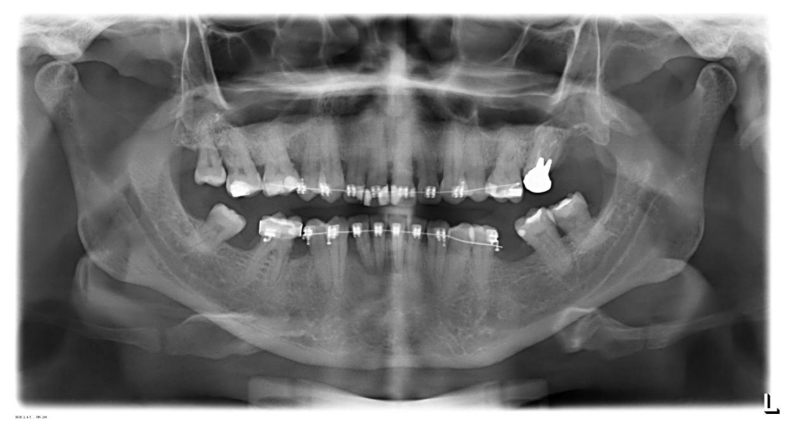

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(panoramic_image, cmap="gray")
ax.axis("off");

## Longaxis Endpoint

Returns a point coordinates for the crown and the root of every tooth in the panoramic image.

In [7]:
longaxis_response = requests.post(
        BASE_URL + "/panoramics/longaxis",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [8]:
pdata = longaxis_response.json()
pdata["entities"] = pdata["entities"][:3]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': '18',
                        'contour': None,
                        'heatmap': None,
                        'line': [   [321.86607142857144, 279.74107142857144],
                                    [305.5, 175.91964285714283]],
                        'model_name': 'longaxis',
                        'point': None,
                        'score': 0.5023287236690521,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': '17',
                        'contour': None,
                        'heatmap': None,
                        'line': [   [376.4196428571429, 294.1607142857143],
                                    [349.1428571428571, 187.45535714285717]],
                        'model_name': 'longaxis',
                        'point': None,
                        'score': 0.5888383537530899,
                        'tooth': None},
          

### Visualization

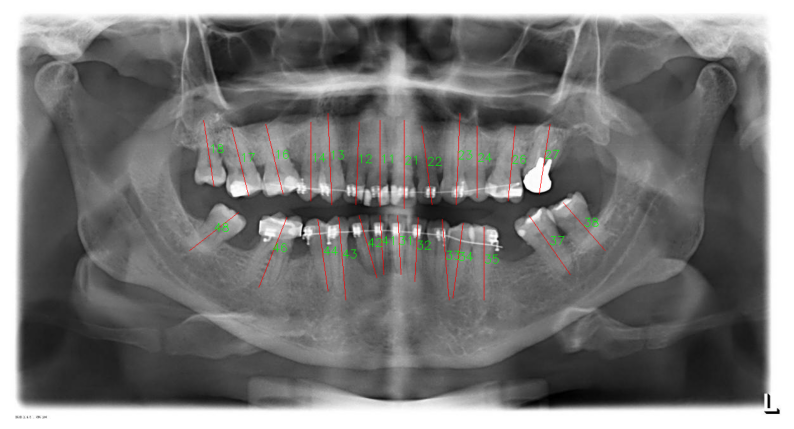

In [9]:
from vis import draw_longaxis_output

dimage = draw_longaxis_output(panoramic_image, longaxis_response.json()["entities"], draw_axis=True)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Panorogram Endpoint

Returns the panorogram curves of the panoramic image.

In [10]:
panorogram_response = requests.post(
        BASE_URL + "/panoramics/panorogram",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [11]:
pdata = panorogram_response.json()
pdata["entities"] = [{**p, "contour": p["contour"][:3]} for p in pdata["entities"][:2]]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'ContMand',
                        'contour': [[78.0, 89.0], [77.0, 90.0], [76.0, 90.0]],
                        'heatmap': None,
                        'line': None,
                        'model_name': 'panorogram',
                        'point': None,
                        'score': None,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'CanManDir',
                        'contour': [   [192.0, 274.0],
                                       [191.0, 275.0],
                                       [190.0, 275.0]],
                        'heatmap': None,
                        'line': None,
                        'model_name': 'panorogram',
                        'point': None,
                        'score': None,
                        'tooth': None}],
    'image_hash': None,
    'model_name': 'panorogram',
    'output_height': 64

### Visualization

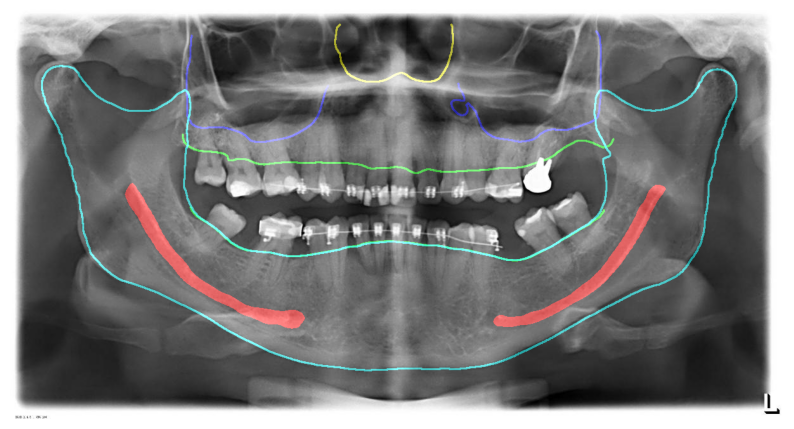

In [12]:
from vis import draw_panorogram
dimage = draw_panorogram(panoramic_image, [[p["class_name"], p["contour"]] for p in panorogram_response.json()["entities"]])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Metals Endpoint

Returns metal structures found on the panoramic image.

In [13]:
metals_response = requests.post(
        BASE_URL + "/panoramics/metals",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Sample Output

In [14]:

pp.pprint(metals_response.json())

{   'entities': [   {   'bbox': [   860.0716552734375,
                                    624.821044921875,
                                    1569.6455078125,
                                    783.9153442382812],
                        'class_name': 'ortodontia',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.9565339088439941,
                        'tooth': None,
                        'type': 'metals'},
                    {   'bbox': [   800.822021484375,
                                    469.63043212890625,
                                    1654.4962158203125,
                                    637.3797607421875],
                        'class_name': 'ortodontia',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.831466555595398,
                        'tooth': 

### Visualization

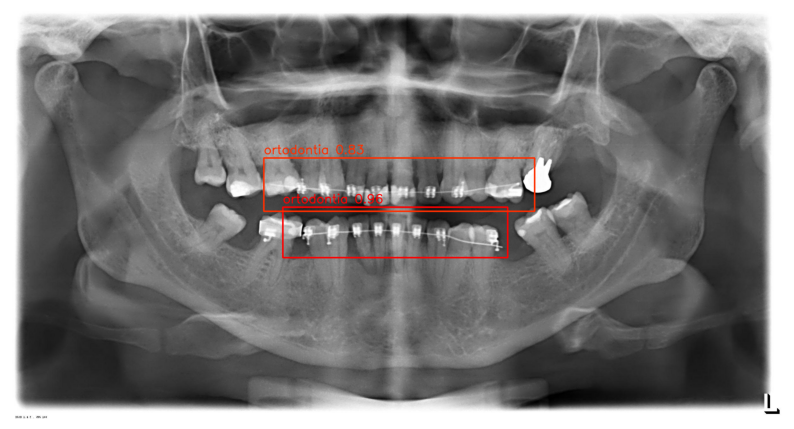

In [15]:
from vis import draw_bboxes

dimage = draw_bboxes(panoramic_image, metals_response.json()["entities"])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Teeth Segmentation Endpoint

Return a segmentation mask in the form of a contour for each found tooth on the panoramic image.

In [16]:
teeth_segmentation_response = requests.post(
        BASE_URL + "/panoramics/teeth-segmentation",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [17]:
teeth_segmentation_response

<Response [200]>

In [18]:
pdata = teeth_segmentation_response.json()
pdata["entities"] = [{**p, "contour": p["contour"][:3]} for p in pdata["entities"][:3]]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': '18',
                        'contour': [[608, 355], [607, 356], [606, 356]],
                        'line': None,
                        'point': None,
                        'score': None,
                        'tooth': None,
                        'type': 'teeth_segmentation'},
                    {   'bbox': None,
                        'class_name': '17',
                        'contour': [[701, 370], [700, 371], [699, 371]],
                        'line': None,
                        'point': None,
                        'score': None,
                        'tooth': None,
                        'type': 'teeth_segmentation'},
                    {   'bbox': None,
                        'class_name': '16',
                        'contour': [[828, 362], [827, 363], [826, 363]],
                        'line': None,
                        'point': None,
                        'score': None,

### Visualization

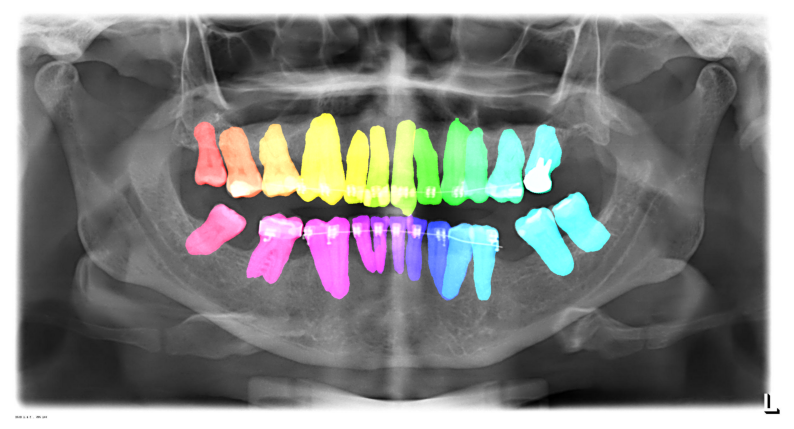

In [19]:
from vis import contour2mask, draw_masks

contours_list = [[p["contour"]] for p in teeth_segmentation_response.json()["entities"]]
masks = [contour2mask(contour, *panoramic_image.size) for contour in contours_list]
dimage = draw_masks(panoramic_image, masks)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Procedures Endpoint

Returns dental proceadures found on the panoramic image.

In [20]:
procedures_response = requests.post(
        BASE_URL + "/panoramics/procedures",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [21]:
pdata = procedures_response.json()
pdata["entities"] = pdata["entities"][:1]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'MatRestCoron',
                        'contour': None,
                        'line': [   [632.8214285714287, 553.7142857142857],
                                    [611.0, 351.83928571428567]],
                        'point': None,
                        'score': 0.6624748706817627,
                        'tooth': '18',
                        'type': 'procedure'}],
    'height': 1292,
    'image_hash': None,
    'width': 2444}


### Visualization

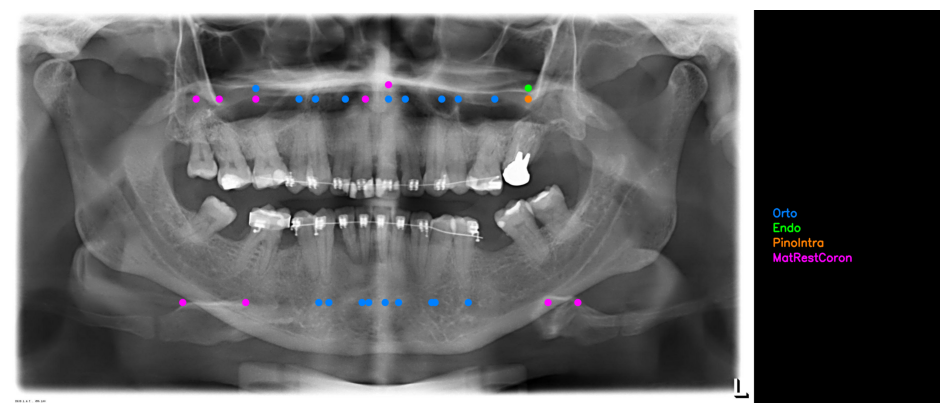

In [22]:
from vis import draw_procedures_output

dimage = draw_procedures_output(panoramic_image, [e for e in procedures_response.json()["entities"] if e["score"] > 0.5])
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(dimage)
ax.axis("off");

## Describe Endpoint

The describe endpoint will return the result of all models at once.  
The models can be called individually from the endpoints described in the docs.

In [23]:
describe_response = requests.post(
        BASE_URL + "/panoramics/describe",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [24]:
pdata = describe_response.json()
pdata["entities"] = pdata["entities"][:3]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'normal',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 1.0,
                        'tooth': None,
                        'type': 'dentition'},
                    {   'bbox': None,
                        'class_name': 'superior_toothless',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 7.882013930426979e-10,
                        'tooth': None,
                        'type': 'dentition'},
                    {   'bbox': None,
                        'class_name': 'mixed',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 2.5856181778971532e-11,
                        'tooth': None,
                 

## Anomalies Heatmap Endpoint

Returns a heatmap of the anomalies found on the panoramic image.

In [25]:
anomalies_response = requests.post(
        BASE_URL + "/panoramics/teeth-anomalies-heatmap",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

In [26]:
# Found classes:
for idx, data in enumerate(anomalies_response.json()):
    if idx > 7:
        break
    if len(data["anomalies"]) == 0:
        continue
    print(f"Tooth {data['tooth_name']}  Anomalies -" + ", ".join([anno["anomaly_name"] for anno in data["anomalies"]]), end=" ")
    print("\n")

Tooth 18  Anomalies -NodP 

Tooth 17  Anomalies -Calc, NodP, Car 

Tooth 16  Anomalies -Calc, NodP, Car 

Tooth 13  Anomalies -Calc 

Tooth 12  Anomalies -Calc, Car 

Tooth 11  Anomalies -Calc, Car 

Tooth 21  Anomalies -Calc, Car 



### Visualization

Visualizing the `Calc` class.

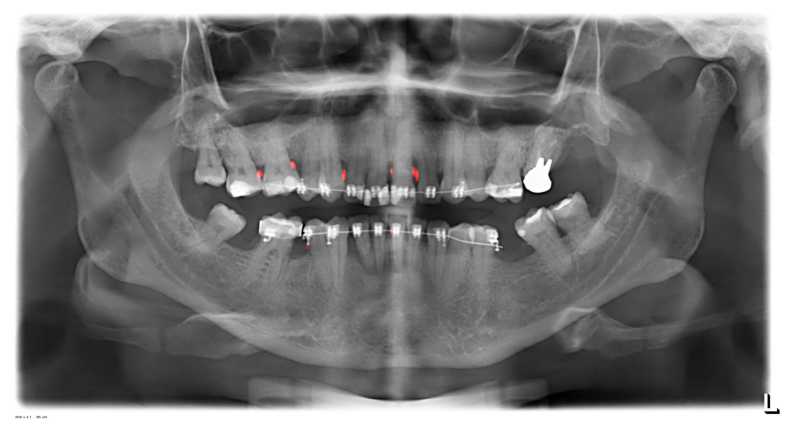

In [27]:
from utils import process_ret_api
from vis import draw_heatmap

heatmap = process_ret_api(anomalies_response.json(), h=panoramic_image.height, w=panoramic_image.width, anomaly2see="Calc")
dimage = draw_heatmap(panoramic_image, heatmap)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

# Periapicals

In [28]:
# The image is converted to grayscale in the backend, so you can convert it before sending in order to save bandwidth.
periapical_image = Image.open("images/periapical0.jpg").convert("L")

## Classify Endpoint

The classify endpoint will return the periapical type among the 14 possible regions.

In [29]:
classify_response = requests.post(
        BASE_URL + "/periapicals/classify",
        json={
            "base64_image": encode_image(periapical_image),
        },
        headers=headers,
    )

### Output Sample

In [30]:
pdata = classify_response.json()
pdata["entities"] = pdata["entities"][:4]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': '42-41-31-32',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.9996941089630127,
                        'tooth': None,
                        'type': 'periapical_classification'},
                    {   'bbox': None,
                        'class_name': '33',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.0002522027643863112,
                        'tooth': None,
                        'type': 'periapical_classification'},
                    {   'bbox': None,
                        'class_name': '43',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 3.3788826840464026e-05,
                       

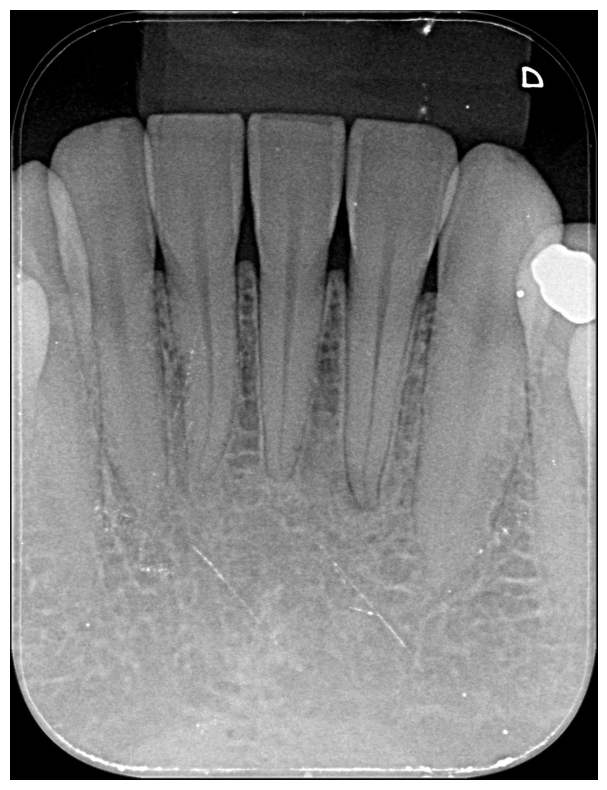

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(periapical_image, cmap="gray")
ax.axis("off");

## Longaxis Endpoit

Return the coordinates on the longaxis of each teeth found on the periapical image.

### Sample Output

In [32]:
longaxis_response = requests.post(
    BASE_URL + "/periapicals/longaxis",
    json={
        "base64_image": encode_image(periapical_image),
    },
    headers=headers,
)

pdata = longaxis_response.json()
pdata["entities"] = pdata["entities"][:3]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': '43_1',
                        'contour': None,
                        'line': None,
                        'point': [135.1875, 1215.75],
                        'score': 0.05661439150571823,
                        'tooth': None,
                        'type': 'longaxis'},
                    {   'bbox': None,
                        'class_name': '43_0',
                        'contour': None,
                        'line': None,
                        'point': [19.3125, 329.265625],
                        'score': 0.2382279932498932,
                        'tooth': None,
                        'type': 'longaxis'},
                    {   'bbox': None,
                        'class_name': '42_1',
                        'contour': None,
                        'line': None,
                        'point': [299.34375, 1063.78125],
                        'score': 0.45180168747901917,
              

### Visualization

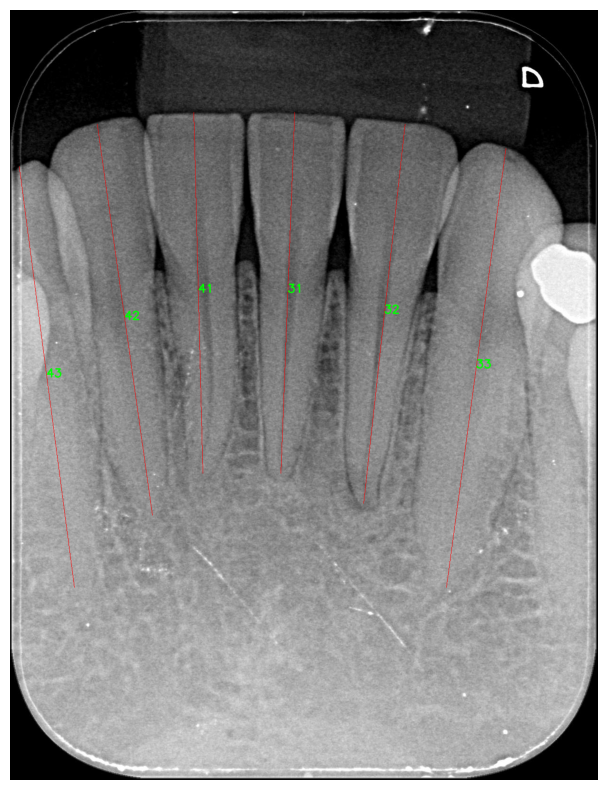

In [33]:
from vis import draw_longaxis_output

dimage = draw_longaxis_output(
    periapical_image, longaxis_response.json()["entities"], draw_axis=True, th=0.001
)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");



# Cephalometry

# Lateral Endpoint
Returns anatomical point coordinates in the lateral radiograph.

In [13]:
tele_image = Image.open("images/tele0.jpg").convert("L")

In [14]:
cefbot_response = requests.post(
    BASE_URL + "/cephalometry/lateral",
    json={
        "base64_image": encode_image(tele_image),
    },
    headers=headers,
)

pdata = cefbot_response.json()
pdata["entities"] = pdata["entities"][:3] 
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'NL',
                        'contour': None,
                        'line': None,
                        'model_name': 'lateral_cefalometry',
                        'point': [840.0, 269.0],
                        'score': 0.8778606057167053,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'N',
                        'contour': None,
                        'line': None,
                        'model_name': 'lateral_cefalometry',
                        'point': [796.0, 269.0],
                        'score': 0.8925878405570984,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'O',
                        'contour': None,
                        'line': None,
                        'model_name': 'lateral_cefalometry',
                        'point': [725.0, 495.0],
   

### Detected Cepholometric points

Nasion Line (NL), Nasion (N), Orbital (O), Supraorbital (SO), Sella (S), Floor of the Sella (FS), Dorsum of the Sella (DS), Upper Clivus (UC), Porion (P), Lower Clivus (LC), Basion (B), Condylion (CD), Posterior Border of the Condyle (PBC), Articulare (A), Anterior Border of the Condyle (ABC), Capitulare (CP), Point Dc (PDC), Gonion (G), Mentonian (M), Pogonion (PG), Gnathion (GN), Point E (PE), Point B (PB), Infradental (ID), Mentale (ME), Promentonian (PM), Point D (PD), Point A (PA), Anterior Nasal Spine (ANS), Point P Line (PPL), Posterior Nasal Spine (PNS), Masticatory Center (MC), Pterygomaxillary (PMX), Pterygoid Vertical Point (PVP), Anterior Upper Airway (AUA), Posterior Upper Airway (PUA), Anterior Lower Airway (ALA), Posterior Lower Airway (PLA), Point Xi (PXI), Anterior Border of the Ramus (ABR), Distal Contact of the First Molar (DCFM), Apex of Upper Molar (AUM), Mesial Contact of the First Molar (MCFM), Downs' Posterior Point (DPP), Mesial Contact of the First Molar (MCFM), Apex of Lower Molar (ALM), Point A/4 (PA4), Point C4/ (PC4), Ricketts' Anterior Point (RAP), Apical (AP), Lower Canine Incision (LCI), Upper Canine Incision (UCI), Apex of Lower Incisor (ALI), Lower Incisal Incision (LII), Upper Incisal Incision (UII), Facial Surface of the Incisor (FSI), Apex of Upper Incisor (AUI), Pogonion Line (PL), Point B Line (PBL), Lower Lip (LL), Stomion (ST), Upper Lip (UL), Point A Line (PAL), Subnasal (SN), Mid Pronasal (MPN), Pronasal (PN), Point V (PV), Point T (PT), Tuber (TB), Incisal Protuberance (IP), PTVR (PTVR), Lower Nasal Limit (LNL), Soft Palate Point (SPP).

### Visualization

In [15]:
from vis import draw_pointsV2

fig = draw_pointsV2(tele_image, cefbot_response.json()["entities"])
offline.iplot(fig)

# Frontal Endpoint
Returns anatomical point coordinates in the frontal radiograph.

In [16]:
tele_image = Image.open("images/tele1.jpg").convert("L")

In [17]:
cefbot_response = requests.post(
    BASE_URL + "/cephalometry/frontal",
    json={
        "base64_image": encode_image(tele_image),
    },
    headers=headers,
)

pdata = cefbot_response.json()
pdata["entities"] = pdata["entities"][:3] 
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'LOE',
                        'contour': None,
                        'line': None,
                        'model_name': 'frontal_cefalometry',
                        'point': [162.0, 161.0],
                        'score': 0.9244553446769714,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'LOD',
                        'contour': None,
                        'line': None,
                        'model_name': 'frontal_cefalometry',
                        'point': [504.0, 159.0],
                        'score': 0.9787856340408325,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'ZL',
                        'contour': None,
                        'line': None,
                        'model_name': 'frontal_cefalometry',
                        'point': [177.0, 171.0],

### Detected Cepholometric points

LOE, LOD, ZL, CLE, CIE, CIME, CSME, CSE, CSD, CSMD, CIMD, CID, CLD, ZR, CZE, ZA, MME, PME, IME, ESQ, AG, Me, GA, DIR, PMD, IMD, JR, MMD, AZ, CZD, CN, ICD, Ena, ICE, NC, JL, A6, PDE, B6, L6, P6, B3, DA1, DB1, A1, B1, 1BD, 1AD, 3B, 6P, 6L, 6B, PDD, 6A.

### Visualization

In [18]:
from vis import draw_pointsV2

fig = draw_pointsV2(tele_image, cefbot_response.json()["entities"])
offline.iplot(fig)

# Analysis

# Face Endpoint
Returns anatomical point coordinates in the frontal face image.

In [3]:
face_image = Image.open("images/face0.jpg").convert("L")

In [4]:
cefbot_response = requests.post(
    BASE_URL + "/analysis/face",
    json={
        "base64_image": encode_image(face_image),
    },
    headers=headers,
)

pdata = cefbot_response.json()
pdata["entities"] = pdata["entities"][:3] 
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'TR',
                        'contour': None,
                        'line': None,
                        'model_name': 'face',
                        'point': [368.0, 319.0],
                        'score': 0.9957469701766968,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'GL',
                        'contour': None,
                        'line': None,
                        'model_name': 'face',
                        'point': [368.0, 508.0],
                        'score': 0.9972483515739441,
                        'tooth': None},
                    {   'bbox': None,
                        'class_name': 'ND',
                        'contour': None,
                        'line': None,
                        'model_name': 'face',
                        'point': [368.0, 547.0],
                        'score': 0.99786835908

### Detected Face points

Trichion (TR), Glabella (GL), Nasal Dorsum (ND), Pronasal (PN), Subnasal (SN), Philtrum (PH), Upper Lip (UL), Upper Incisal Incision (UIC), Lower Lip (LL), Soft Mentonian (SM), Right Eye Corner (REC), Right Pupil (RP), Right Zygomatic (RZ), Right Nasal Wing (RNW), Right Labial Commissure (RLC), Left Eye Corner (LEC), Left Pupil (LP), Left Zygomatic (LZ), Left Nasal Wing (LNW), Left Labial Commissure (LLC).

### Visualization

In [5]:
from vis import draw_pointsV2

fig = draw_pointsV2(face_image, cefbot_response.json()["entities"], keep_aspect_ratio=True)

offline.iplot(fig)